# GP06 GeoPandas EXERCISE TWO
___

In [1]:
# Import libraries: Geopandas, Pandas and Matplotlip.pyplot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Spatial data
* Load the file: localdata/swimming_pools.shp
* Display the first 3 rows of the data

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)


___
## 2. Buffer Analysis
* Plot the loaded data from above.

<Axes: >

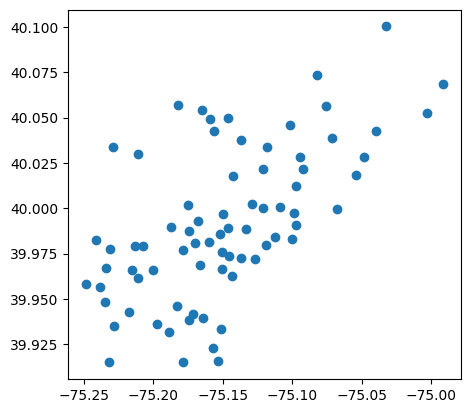

* Find the swimming pool with the name, 'Jardel Pool' and store this data into a variable.
* Create and plot a buffer for this data with a distance of 12.

C:\Users\likre\AppData\Local\Temp\ipykernel_22080\2833921026.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jb = j.geometry.buffer(12)


<Axes: >

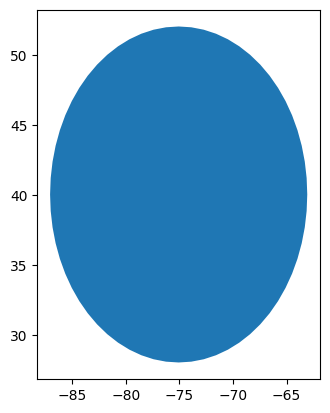

* Check the CRS of the data (buffer) and find out the units of measurement.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

* Go to the epsg.io website: https://epsg.io/
* Search for a suitable CRS with metre as the unit of measurements for Philadelphia (ANSWER: EPSG:3651
NAD83(NSRS2007) / Pennsylvania South).
* Reproject and check the above data (the first Jardel Pool data) with the new CRS.

<Projected CRS: EPSG:3651>
Name: NAD83(NSRS2007) / Pennsylvania South
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

* Recreate a buffer for reprojected data with a distance of 12.
* Plot the buffer area.

<Axes: >

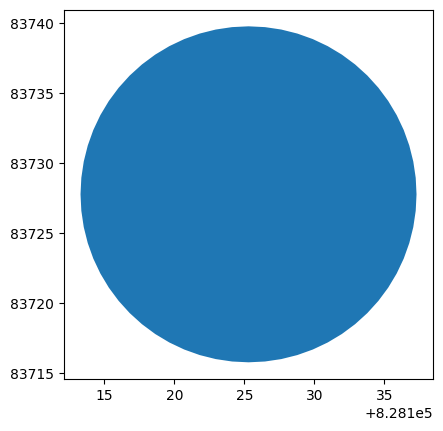

___
## 3. Spatial Join
* Load the file: data/incidentsClean.shp
* Display the first 5 rows of the data

In [14]:
# The points dataset


,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)


* Load the file: data/Philadelphia/Neighborhoods_Philadelphia.shp
* Display the first 5 rows of the data

In [15]:
# The polygon dataset


,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


* Find out if CRS are the same for both the datasets.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

* Reproject the incidents data from EPSG:4326 to EPSG:2272 and verify.

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

* Plot and overlay the above two datasets.

<Axes: >

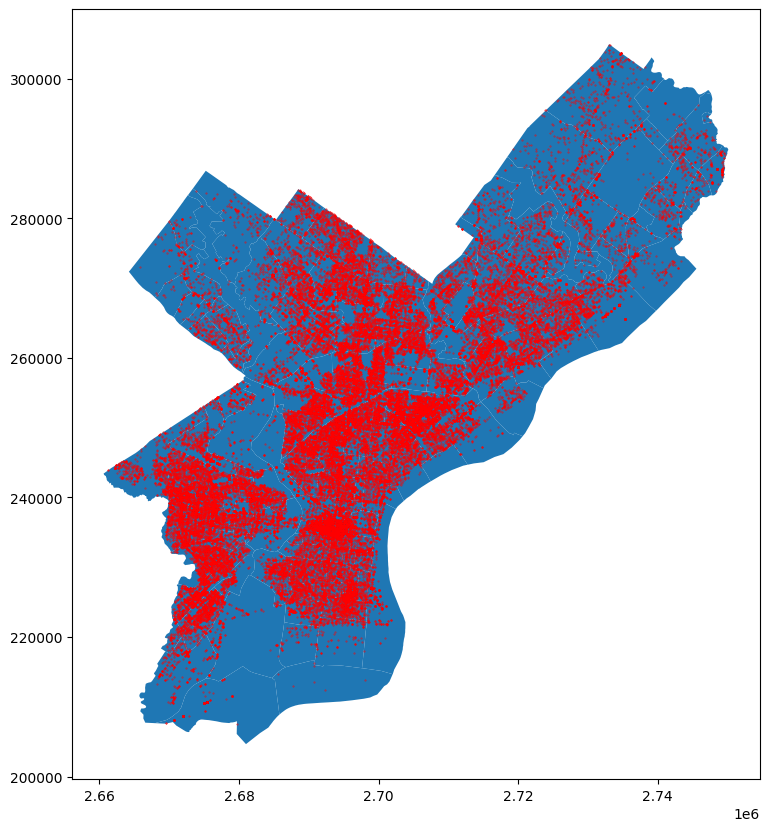

* Combine the two above datasets (point & polygon) via **gpd.sjoin()**
* Use the following parameters:
    * **how='inner'**
    * **predicate='within'**
* Display the first 10 rows of the data.

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,...,point_y,lat,lng,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
60436,3274225,9,1,10/06/2020 18:45,10/06/2020,18:45:52,18,2.020090e+11,1500 BLOCK CHESTNUT ST,500,...,39.950836,39.950836,-75.166917,POINT (2692597.821 235538.573),99,RITTENHOUSE,Rittenhouse,Rittenhouse,16365.270958,1.462096e+07
57629,3143021,15,2,16/05/2020 23:49,16/05/2020,23:49:00,23,2.020150e+11,2900 BLOCK LARDNER ST,300,...,40.028339,40.028339,-75.066164,POINT (2719974.930 264600.746),41,MAYFAIR,Mayfair,Mayfair,38261.575206,5.217175e+07
16064,971946,24,1,30/01/2020 22:01,30/01/2020,22:01:19,22,2.020240e+11,3200 BLOCK SHELBOURNE ST,1800,...,39.996798,39.996798,-75.113758,POINT (2706995.451 252714.684),74,HARROWGATE,Harrowgate,Harrowgate,23231.246816,2.535047e+07
53896,3137552,12,3,01/05/2020 19:43,01/05/2020,19:43:00,19,2.020120e+11,6700 BLOCK BUIST AVE,1800,...,39.918477,39.918477,-75.232492,POINT (2674556.556 223224.646),150,ELMWOOD,Elmwood,Elmwood,23215.724521,2.190144e+07
21070,1368738,15,1,24/02/2020 17:26,24/02/2020,17:26:00,17,2.020150e+11,4300 BLOCK N PENN ST,1500,...,40.012096,40.012096,-75.090536,POINT (2713330.800 258479.733),40,FRANKFORD,Frankford,Frankford,26646.606394,4.135242e+07
43898,3128589,14,1,28/05/2020 20:18,28/05/2020,20:18:00,20,2.020140e+11,5300 BLOCK CHEW AV,2400,...,40.041782,40.041782,-75.158722,POINT (2693922.410 268721.474),53,GERMANTOWN_EAST,"Germantown, East",East Germantown,22052.734661,2.568980e+07
19639,1254715,19,2,13/03/2020 21:04,13/03/2020,21:04:00,21,2.020190e+11,N 61ST ST / CALLOWHILL ST,2600,...,39.968350,39.968350,-75.241455,POINT (2671527.684 241313.536),135,HADDINGTON,Haddington,Haddington,22913.736192,2.229771e+07
43624,3124190,22,4,14/04/2020 13:54,14/04/2020,13:54:00,13,2.020220e+11,N 29TH ST / W THOMPSON ST,1400,...,39.976317,39.976317,-75.183101,POINT (2687792.535 244684.743),79,BREWERYTOWN,Brewerytown,Brewerytown,14790.673736,1.125654e+07
63474,3169752,39,2,04/06/2020 08:09,04/06/2020,08:09:00,8,2.020390e+11,1900 BLOCK W TIOGA ST,1400,...,40.007189,40.007189,-75.160026,POINT (2693926.911 256114.688),62,TIOGA,Tioga,Tioga,27189.667081,3.162796e+07
10121,622400,24,2,10/02/2020 17:37,10/02/2020,17:37:00,17,2.020240e+11,300 BLOCK E ALLEGHENY AVE,500,...,39.997154,39.997154,-75.124904,POINT (2703870.181 252751.173),76,UPPER_KENSINGTON,Upper Kensington,Upper Kensington,19841.099278,2.278303e+07


* The following code determines the number of incidents occurred in each neighbourhood.
* The code relies on the Pandas groupby method and a conversion from the Series datatype to Pandas dataframe via: **.to_frame.reset_index()**

,NAME,COUNTS
0,ACADEMY_GARDENS,81
1,AIRPORT,162
2,ALLEGHENY_WEST,924
3,ANDORRA,56
4,ASTON_WOODBRIDGE,74


* Use a Pandas method to find the (incident) counts for the neighbourhood, BREWERYTOWN.

8    451
Name: COUNTS, dtype: int64

* Use a Pandas method to find the neighbourhoods with the lowest and the highest (incident) counts.

,NAME,COUNTS
80,MECHANICSVILLE,3
88,NAVY_YARD,7
112,PORT_RICHMOND,8
23,CRESTMONT_FARMS,8
108,PENNYPACK_PARK,20
...,...,...
117,RITTENHOUSE,1532
99,OLNEY,1545
116,RICHMOND,1780
21,COBBS_CREEK,1965


* Merge the incident count dataframe with the original neighbourhood (polygon) dataset via **.merge()**
* Use the following parameters:
    * **on='NAME'**
    * **how='outer'**
* The resulting merge becomes a GeoDataFrame. Display the first 5 rows of the data.

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry,COUNTS
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",142
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",413
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",281
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",134
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",279


* Check the datatype of the merged data.

geopandas.geodataframe.GeoDataFrame

* Export the merged GeoDataframe as GeoJson via the method: **.to_file()**
* Saving file name and location: localdata/nc.Geojson
* Use the following parameters:
    * driver='GeoJSON' in to_file() method.

___